# ML-Dev-Ease-Classification-vs.-Generation
This notebook contains all the analysis and plots.

In [1]:
import pandas as pd
from ast import literal_eval
from matplotlib import pyplot as plt

## Step 2.5 - Comparing ML Apps

In [8]:
spaces_df = pd.read_csv('../data/spaces_extra.csv')
models_df = pd.read_csv('../data/models.csv')

### Getting a Sense of Data

In [9]:
# How many spaces exist in total?
n_spaces = spaces_df.shape[0]
print(f"N.spaces: {n_spaces}")

# How many spaces have specified the models they used?
n_spaces_models = spaces_df.loc[spaces_df['models'].notna()].shape[0]
print(f"N.spaces with specified models: {n_spaces_models}")

N.spaces: 175690
N.spaces with specified models: 38982


### Preprocess

In [10]:
# Remove spaces that have not specified models
spaces_df = spaces_df.loc[spaces_df['models'].notna()].copy()

In [11]:
spaces_df['models'] = spaces_df['models'].apply(literal_eval)   # Typecast

# Transform column 'models' of type list into rows
spaces_models_df = spaces_df.explode(
    column = 'models',
    ignore_index = True
).rename(
    columns = {
        'models': 'model'   # Make it singular since it's only one model now
    }
)

print(f"N.models: {spaces_models_df.shape[0]}")
print(f"N.unqiue models: {spaces_models_df['model'].nunique()}")

N.models: 104448
N.unqiue models: 15239


In [13]:
# Remove models other than our selected ones (from 'models.csv')
spaces_models_df = spaces_models_df.loc[spaces_models_df['model'].isin(models_df['name'])]
print(f"N.in-domain models: {spaces_models_df.shape[0]}")
print(f"N.spaces with in-domain models: {spaces_models_df['name'].nunique()}")

N.in-domain models: 4375
N.spaces with in-domain models: 3737


In [40]:
# Remove irrelevant features
models_df = models_df[['name', 'tag', 'pipeline_tag']].rename(
    columns = {
        'name': 'model'
    }
)
spaces_models_df = spaces_models_df[['name', 'model']].rename(
    columns = {
        'name': 'space'
    }
)

# Merge two DataFrames into one
spaces_models_df = spaces_models_df.merge(models_df)
spaces_models_df.head(3)

,space,model,tag,pipeline_tag
0,Anthos23/hummus,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification
1,sohomghosh/FLUEnT,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification
2,slachitoff/CS-GY_6613_Project,mrm8488/distilroberta-finetuned-financial-news...,text-classification,text-classification


### Exploratory Data Analysis

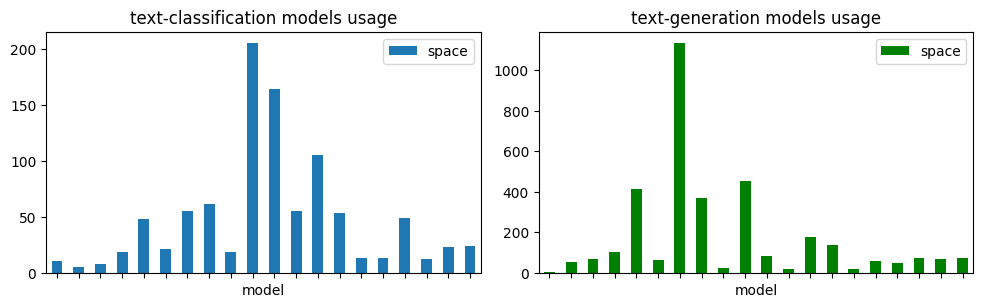

In [103]:
# Usage in spaces for both 'text classification' and 'text generation' models

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Text Classification plot
spaces_models_df.loc[spaces_models_df['tag'] == 'text classification'].groupby(
    by = 'model',
    as_index = False
).count().plot.bar(x='model', y='space', ax=axes[0], subplots=True)

# Text Generation plot
spaces_models_df.loc[spaces_models_df['tag'] == 'text generation'].groupby(
    by = 'model',
    as_index = False
).count().plot.bar(x='model', y='space', ax=axes[1], subplots=True, color='green')

# Set subtitles
axes[0].title.set_text('text-classification models usage')
axes[1].title.set_text('text-generation models usage')

# Remove xlabels
for tick in axes[0].get_xticklabels() + axes[1].get_xticklabels():
    tick.set_visible(False)
plt.show()

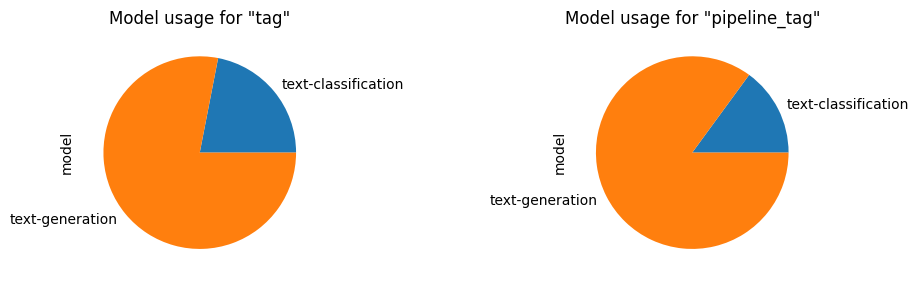

In [120]:
# Model usage per tags. Since there are two types of "tag" and "pipeline_tag", both are plotted.

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Model usage per "tag" column
spaces_models_df.groupby(
    by = 'tag',
    as_index = False
).count().set_index('tag').plot.pie(y='model', legend=False, ax=axes[0], subplots=True)

# Model usage per "pipeline_tag" column
spaces_models_df.loc[spaces_models_df['pipeline_tag'].isin(['text-classification', 'text-generation'])].groupby(
    by = 'pipeline_tag',
    as_index = False
).count().set_index('pipeline_tag').plot.pie(y='model', legend=False, ax=axes[1], subplots=True)

# Set subtitles
axes[0].title.set_text('Model usage for "tag"')
axes[1].title.set_text('Model usage for "pipeline_tag"')

plt.show()

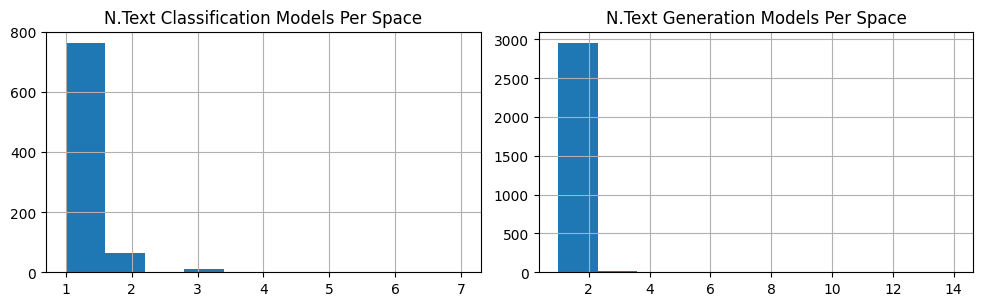

In [152]:
# Distribution for number of models used in spaces

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))
fig.tight_layout()

# Text Classification
spaces_models_df.loc[spaces_models_df['tag'] == 'text-classification'].groupby(
    by = ['space'],
    as_index = False
).count()['model'].hist(ax=axes[0])

# Text Generation
spaces_models_df.loc[spaces_models_df['tag'] == 'text-generation'].groupby(
    by = ['space'],
    as_index = False
).count()['model'].hist(ax=axes[1])

# Set subtitles
axes[0].title.set_text('N.Text Classification Models Per Space')
axes[1].title.set_text('N.Text Generation Models Per Space')

plt.show()